In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

import warnings
import pandas as pd
import numpy as np
import nltk
import re
import csv

nltk.download('stopwords')
nltk.download('punkt')
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Feb11F/dataset/main/Data%20Berita%20Detik%20(1).csv')
df

Judul  \
0   Ilmuwan Laporkan Perubahan Iklim Ancam Kehidup...   
1   Badan Riset dan Inovasi Nasional Didirikan ole...   
2   Apa Itu SDGs? Ini Pengertian dan 17 Tujuan Glo...   
3   Apa Itu Gaya Gesek? Pengertian, Jenis, Rumus, ...   
4   Jokowi Letakkan Batu Pertama Sekolah di IKN Nu...   
5   Hati-hati! 5 Kebiasaan Orang Tua Ini Bisa Rusa...   
6   Pendaftaran S2 Unair 2023 Kembali Dibuka, Cek ...   
7   Identitas Buku: Pengertian, Unsur, Fungsi, dan...   
8   Pengertian Genosida yang Jadi Alasan Petinggi ...   
9   BRI Kembali Buka BFLP General dan IT buat Lulu...   
10  Gelombang Panas di Laut, Miliaran Kepiting Sal...   
11  Beasiswa Sekolah SMA Unggulan CT ARSA Foundati...   
12  4 Aplikasi yang Bisa Bantu UTS Kamu, Siswa-Mah...   
13  Respirasi Aerob: Pengertian, Tahapan, Ciri, da...   
14  Bencana Kelaparan di Yahukimo: Sebab dan Penan...   

                         Tanggal  \
0   Kamis, 02 Nov 2023 07:30 WIB   
1   Kamis, 02 Nov 2023 07:00 WIB   
2   Kamis, 02 Nov 2023 06:30 WIB   
3   Kamis, 02 Nov 2023 06:00 WIB   
4    Rabu, 01 Nov 2023 20:00 WIB   
5    Rabu, 01 Nov 2023 19:45 WIB   
6    Rabu, 01 Nov 2023 19:34 WIB   
7    Rabu, 01 Nov 2023 18:45 WIB   
8    Rabu, 01 Nov 2023 18:30 WIB   
9    Rabu, 01 Nov 2023 17:56 WIB   
10   Rabu, 01 Nov 2023 17:56 WIB   
11   Rabu, 01 Nov 2023 17:30 WIB   
12   Rabu, 01 Nov 2023 17:00 WIB   
13   Rabu, 01 Nov 2023 16:45 WIB   
14   Rabu, 01 Nov 2023 16:30 WIB   

                                              Artikel Category  
0   Para ilmuwan memperingatkan kondisi Bumi yang ...      Edu  
1   Indonesia memiliki badan atau lembaga yang ber...      Edu  
2   Pernahkah detikers mendengar istilah SDGs? SDG...      Edu  
3   Detikers, pernahkah kamu mendorong meja dan me...      Edu  
4   Presiden Joko Widodo (Jokowi) meletakkan batu ...      Edu  
5   Peran dan kebiasaan orang tua akan sangat memp...      Edu  
6   Pendaftaran jenjang Magister atau S2 di Univer...      Edu  
7   Ketika meresensi buku atau mengulas buku terda...      Edu  
8   Craig Mokhiber mengundurkan diri dari jabatann...      Edu  
9   Sumber Daya Manusia (SDM) yang unggul menjadi ...      Edu  
10  Populasi kepiting salju di Pantai Alaska diket...      Edu  
11  SMA Unggulan CT ARSA Foundation Sukoharjo, Jaw...      Edu  
12  Memasuki masa ujian, siswa dan mahasiswa bisa ...      Edu  
13  Semua makhluk memerlukan respirasi untuk menda...      Edu  
14  24 Orang meninggal dunia akibat bencana gagal ...      Edu

In [ ]:
def cleaning(text):
    # Remove non-alphabetic characters (letters, spaces, and punctuation other than periods)
    text = re.sub(r'[^a-zA-Z\s.,]', '', text).strip()
    return text

df['Cleaning'] = df['Artikel'].apply(cleaning)
df['Cleaning']

0     Para ilmuwan memperingatkan kondisi Bumi yang ...
1     Indonesia memiliki badan atau lembaga yang ber...
2     Pernahkah detikers mendengar istilah SDGs SDGs...
3     Detikers, pernahkah kamu mendorong meja dan me...
4     Presiden Joko Widodo Jokowi meletakkan batu pe...
5     Peran dan kebiasaan orang tua akan sangat memp...
6     Pendaftaran jenjang Magister atau S di Univers...
7     Ketika meresensi buku atau mengulas buku terda...
8     Craig Mokhiber mengundurkan diri dari jabatann...
9     Sumber Daya Manusia SDM yang unggul menjadi sa...
10    Populasi kepiting salju di Pantai Alaska diket...
11    SMA Unggulan CT ARSA Foundation Sukoharjo, Jaw...
12    Memasuki masa ujian, siswa dan mahasiswa bisa ...
13    Semua makhluk memerlukan respirasi untuk menda...
14    Orang meninggal dunia akibat bencana gagal pan...
Name: Cleaning, dtype: object

In [ ]:
from nltk.tokenize import sent_tokenize
# Fungsi untuk mengekstrak artikel menjadi kalimat
def extract_sentences(article):
    sentences = sent_tokenize(article)
    return sentences

# Menerapkan fungsi extract_sentences ke setiap baris dalam kolom 'artikel'
df['Kalimat'] = df['Cleaning'].apply(extract_sentences)
df['Kalimat']

0     [Para ilmuwan memperingatkan kondisi Bumi yang...
1     [Indonesia memiliki badan atau lembaga yang be...
2     [Pernahkah detikers mendengar istilah SDGs SDG...
3     [Detikers, pernahkah kamu mendorong meja dan m...
4     [Presiden Joko Widodo Jokowi meletakkan batu p...
5     [Peran dan kebiasaan orang tua akan sangat mem...
6     [Pendaftaran jenjang Magister atau S di Univer...
7     [Ketika meresensi buku atau mengulas buku terd...
8     [Craig Mokhiber mengundurkan diri dari jabatan...
9     [Sumber Daya Manusia SDM yang unggul menjadi s...
10    [Populasi kepiting salju di Pantai Alaska dike...
11    [SMA Unggulan CT ARSA Foundation Sukoharjo, Ja...
12    [Memasuki masa ujian, siswa dan mahasiswa bisa...
13    [Semua makhluk memerlukan respirasi untuk mend...
14    [Orang meninggal dunia akibat bencana gagal pa...
Name: Kalimat, dtype: object

In [ ]:
df['Kalimat'][0]

['Para ilmuwan memperingatkan kondisi Bumi yang sedang mengalami masalah perubahan iklim dalam studi terbaru berjudul The  state of the climate report entering uncharted territory dalam BioScience pada  Oktober lalu.',
 'Berdasarkan  tanda yang digunakan untuk melacak perubahan iklim,  diantaranya menunjukkan rekor ekstrim.',
 'Hal tersebut meliputi pengukuran suhu ratarata permukaan Bumi, subsidi bahan bakar fosil, permukaan es laut, dan tutupan hutan global.',
 'Sebelum tahun , suhu ratarata global diketahui tidak pernah , derajat celcius lebih tinggi dari suhu pada masa praindustri.',
 'Sedangkan pada tahun , selama  hari saja suhu global telah melampaui ambang batas.',
 'SCROLL TO CONTINUE WITH CONTENT Sebagai contoh kondisi suhu pada bulan Juli lalu di mana menjadi bulan terpanas, mungkin kondisi tersebut baru terjadi dalam .',
 'tahun terakhir.',
 'Rekor suhu terpanas tersebut disebabkan oleh aktivitas manusia dan diperburuk oleh pola iklim berulang, yang biasa dikenal sebagai El

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
df['Dokumen'] = df['Kalimat'].apply(lambda sentences: ' '.join(sentences))
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Dokumen'])
tfidf_df = pd.DataFrame(data=tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_df

aac      abad       ac     acara       ada    adalah    adanya  \
0   0.00000  0.045404  0.00000  0.000000  0.000000  0.017806  0.000000   
1   0.00000  0.000000  0.00000  0.000000  0.000000  0.008570  0.000000   
2   0.00000  0.000000  0.00000  0.000000  0.009953  0.021297  0.000000   
3   0.00000  0.000000  0.00000  0.000000  0.028368  0.020233  0.000000   
4   0.00000  0.000000  0.00000  0.000000  0.062570  0.000000  0.037934   
5   0.00000  0.000000  0.00000  0.000000  0.025632  0.027423  0.000000   
6   0.04439  0.000000  0.04439  0.000000  0.000000  0.017408  0.000000   
7   0.00000  0.000000  0.00000  0.000000  0.000000  0.050033  0.000000   
8   0.00000  0.000000  0.00000  0.000000  0.022665  0.032332  0.000000   
9   0.00000  0.000000  0.00000  0.000000  0.000000  0.012893  0.000000   
10  0.00000  0.000000  0.00000  0.000000  0.000000  0.020515  0.000000   
11  0.00000  0.000000  0.00000  0.000000  0.000000  0.000000  0.000000   
12  0.00000  0.000000  0.00000  0.034669  0.038124  0.027192  0.000000   
13  0.00000  0.000000  0.00000  0.000000  0.000000  0.072426  0.000000   
14  0.00000  0.000000  0.00000  0.000000  0.065196  0.000000  0.000000   

      adapun   adenine      adil  ...     yaitu     yakni      yang    yazidi  \
0   0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.206418  0.000000   
1   0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.085153  0.000000   
2   0.000000  0.000000  0.054308  ...  0.018522  0.000000  0.193991  0.000000   
3   0.000000  0.000000  0.000000  ...  0.008798  0.000000  0.128450  0.000000   
4   0.032939  0.000000  0.000000  ...  0.019406  0.000000  0.221731  0.000000   
5   0.000000  0.000000  0.000000  ...  0.023849  0.000000  0.136246  0.000000   
6   0.077091  0.000000  0.000000  ...  0.022709  0.000000  0.043245  0.000000   
7   0.000000  0.000000  0.000000  ...  0.026107  0.000000  0.132577  0.000000   
8   0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.227570  0.041223   
9   0.000000  0.000000  0.000000  ...  0.016818  0.028547  0.074731  0.000000   
10  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.186862  0.000000   
11  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.059326  0.000000   
12  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.101324  0.000000   
13  0.000000  0.023085  0.000000  ...  0.047240  0.000000  0.089959  0.000000   
14  0.000000  0.000000  0.000000  ...  0.000000  0.051482  0.125143  0.000000   

    yogyakarta      york   youtube       yuk    yunani       zat  
0     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
1     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
2     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
3     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
4     0.000000  0.000000  0.037934  0.000000  0.000000  0.000000  
5     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
6     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
7     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
8     0.000000  0.041223  0.000000  0.000000  0.082446  0.000000  
9     0.028547  0.000000  0.000000  0.000000  0.000000  0.000000  
10    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
11    0.039659  0.000000  0.000000  0.000000  0.000000  0.000000  
12    0.000000  0.000000  0.000000  0.030104  0.000000  0.000000  
13    0.000000  0.000000  0.000000  0.020046  0.000000  0.046171  
14    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  

[15 rows x 2067 columns]

In [ ]:
# # Menggabungkan DataFrame asli dengan DataFrame TF-IDF
# result_df = pd.concat([df[['Judul']], tfidf_df], axis=1)
# result_df

In [ ]:
# Menyimpan hasilnya ke dalam file CSV baru
output_file_path = 'berita_dalam_kalimat1.csv'
df.to_csv(output_file_path, index=False)

In [ ]:
# import library untuk menghitung cosinus similarity

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
len_kalimat = df['Dokumen'].shape[0]
temp = []
node = 0
for i in range(len_kalimat):
  for j in range(len_kalimat - i):
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform([df['Dokumen'][i], df['Dokumen'][i+j]])
    cosine_sim = cosine_similarity(tfidf_matrix[0], tfidf_matrix[1])
    similarity_score = cosine_sim[0][0]
    temp.append(["node-{} {}&{}".format(node, i, i+j), similarity_score])
    node +=1

In [ ]:
temp

[['node-0 0&0', 1.0000000000000004],
 ['node-1 0&1', 0.2362065469587537],
 ['node-2 0&2', 0.34149599485946275],
 ['node-3 0&3', 0.1954404114937564],
 ['node-4 0&4', 0.2711123394290881],
 ['node-5 0&5', 0.2530828620678776],
 ['node-6 0&6', 0.1700844544670314],
 ['node-7 0&7', 0.19767682048525687],
 ['node-8 0&8', 0.3610948761753333],
 ['node-9 0&9', 0.2545552818933024],
 ['node-10 0&10', 0.3827744777634448],
 ['node-11 0&11', 0.1475862083428952],
 ['node-12 0&12', 0.17734332559751098],
 ['node-13 0&13', 0.23150660388199845],
 ['node-14 0&14', 0.33754567867367086],
 ['node-15 1&1', 0.9999999999999999],
 ['node-16 1&2', 0.35892622189459694],
 ['node-17 1&3', 0.1457038825684328],
 ['node-18 1&4', 0.18165731907497862],
 ['node-19 1&5', 0.19575431113074276],
 ['node-20 1&6', 0.2340059299659015],
 ['node-21 1&7', 0.18986811101255427],
 ['node-22 1&8', 0.21765871350195448],
 ['node-23 1&9', 0.29323256585325425],
 ['node-24 1&10', 0.22020341184940104],
 ['node-25 1&11', 0.1431316209309433],
 ['

In [ ]:
sentences = [df['Dokumen'][0], df['Dokumen'][1], df['Dokumen'][2],df['Dokumen'][3],df['Dokumen'][4],df['Dokumen'][5]]
tfidf_matrix = tfidf_vectorizer.fit_transform(sentences).toarray()
G = nx.Graph()

for i in range(len(sentences)):
    for j in range(i + 1, len(sentences)):
        similarity_score = cosine_similarity([tfidf_matrix[i]], [tfidf_matrix[j]])[0][0]
        print(similarity_score)
        if similarity_score > 0.01:  # Sesuaikan threshold sesuai kebutuhan
            G.add_edge(sentences[i], sentences[j], weight=similarity_score)

0.15321944927763406
0.22725989210662956
0.1192090655576112
0.1764774616058994
0.1773980233795781
0.21800724001021088
0.07717391149372549
0.12613634337277507
0.12295637125412924
0.09969725606952928
0.16486115418394504
0.14827139356171753
0.09024106710273735
0.09128113336338209
0.16692144788809143


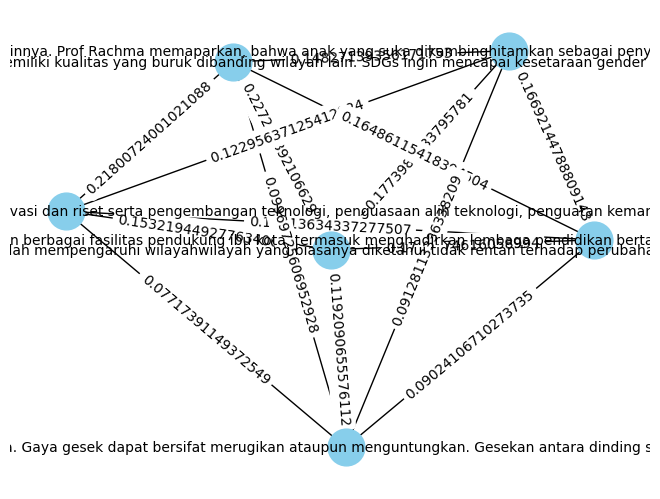

In [ ]:
# Menggambar grafik
pos = nx.spring_layout(G)
edge_labels = {(n1, n2): d['weight'] for n1, n2, d in G.edges(data=True)}

nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=10)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.show()

In [ ]:
closeness_centrality = nx.closeness_centrality(G, distance='weight')

sorted_closeness_centrality = {node: value for node, value in sorted(closeness_centrality.items(), key=lambda item: item[1], reverse=True)}

# Membuat DataFrame dari hasil yang diurutkan
df = pd.DataFrame(list(sorted_closeness_centrality.items()), columns=['Node', 'Closeness Centrality'])

# Menampilkan DataFrame
df

Node  Closeness Centrality
0  Detikers, pernahkah kamu mendorong meja dan me...             10.468958
1  Indonesia memiliki badan atau lembaga yang ber...              7.617803
2  Peran dan kebiasaan orang tua akan sangat memp...              7.073853
3  Presiden Joko Widodo Jokowi meletakkan batu pe...              6.900002
4  Pernahkah detikers mendengar istilah SDGs SDGs...              6.183471
5  Para ilmuwan memperingatkan kondisi Bumi yang ...              5.915687

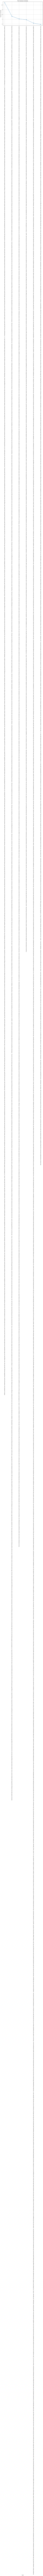

In [ ]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# Hitung closeness centrality
closeness_centrality = nx.closeness_centrality(G, distance='weight')

sorted_closeness_centrality = {node: value for node, value in sorted(closeness_centrality.items(), key=lambda item: item[1], reverse=True)}

# Membuat DataFrame dari hasil yang diurutkan
df = pd.DataFrame(list(sorted_closeness_centrality.items()), columns=['Node', 'Closeness Centrality'])

# Menampilkan DataFrame
print(df)

# Membuat grafik closeness centrality
plt.figure(figsize=(10, 6))
plt.bar(df['Node'], df['Closeness Centrality'])
plt.xlabel('Node')
plt.ylabel('Closeness Centrality')
plt.title('Closeness Centrality Graph')
plt.xticks(rotation=90)  # Untuk membuat label node lebih mudah dibaca

plt.show()
